# COGS 189 Project: EEG Motor Imagery Classification

## Introduction

Brain-Computer Interfaces (BCIs) enable direct communication between the brain and external devices by decoding neural signals. 
This project investigates whether EEG signals from the BCI Competition IV Dataset 2a can distinguish different imagined motor movements.

We progressively evaluate classification performance across multiple milestones:

1. Binary classification:
   - Left hand vs Right hand
   - Right hand vs Foot
   - Left hand vs Foot
   - ...
2. Multi-class classification:
   - Left vs Right vs Foot vs Tongue

## Imports


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import requests
import mne

## Dataset: BCI Competition IV – Dataset 2a
The BCI Competition IV Dataset 2a is a benchmark EEG dataset for motor imagery research, provided as part of the international BCI Competition IV hosted by the Berlin BCI group and the Graz BCI lab. It contains multi‑session EEG recordings from **9 subjects** performing **cued motor imagery** tasks of four types: **left hand, right hand, foot, and tongue**.

Each subject performed two sessions on separate days. Each session consists of 6 runs, and each run contains 48 trials — 12 trials per class — yielding **288 trials per session**.

- **EEG channels:** 22 scalp electrodes  
- **EOG channels:** 3 (used for artifact detection, usually removed in preprocessing)  
- **Sampling rate:** 250 Hz  
- **Recordings:** Band‑pass filtered between 0.5–100 Hz with a 50 Hz notch filter  
- **File format:** General Data Format for biomedical signals (GDF)  
- **Classes:**  
  - Left hand imagery  
  - Right hand imagery  
  - Foot imagery  
  - Tongue imagery 

The dataset is widely used for motor imagery classification research and benchmarking classification pipelines (e.g., CSP+LDA, deep learning models).

For more infomation, see https://www.bbci.de/competition/iv/desc_2a.pdf

**Download URL (official):**  
👉 https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip  

In [9]:
DATA_URL = "https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip"
DATA_DIR = "./data/BCICIV_2a_gdf/"
ZIP_PATH = "./data/BCICIV_2a_gdf.zip"

# Step 1: Check if dataset folder exists
if os.path.isdir(DATA_DIR) and len(os.listdir(DATA_DIR)) > 0:
    print(f"Dataset folder already exists with {len(os.listdir(DATA_DIR))} files.")
else:
    # Step 2: Download ZIP if not exists
    if not os.path.exists(ZIP_PATH):
        print(f"Downloading dataset from {DATA_URL} ...")
        response = requests.get(DATA_URL, stream=True)
        total_size = int(response.headers.get('content-length', 0))
        block_size = 1024  # 1 KB
        with open(ZIP_PATH, 'wb') as f:
            for data in response.iter_content(block_size):
                f.write(data)
        print("Download completed!")
    else:
        print("Found existing ZIP file:", ZIP_PATH)

    # Step 3: Extract ZIP
    print("Extracting dataset ...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(DATA_DIR)
    print(f"Dataset extracted to {DATA_DIR}")

Dataset folder already exists with 18 files.


## Milestone 1: Binary Classification

### Left Hand vs Right Hand
The first milestone focuses on distinguishing imagined left-hand and right-hand movements using Common Spatial Patterns (CSP) and Linear Discriminant Analysis (LDA).

Extracting GDF parameters from ./data/BCICIV_2a_gdf//A01T.gdf...
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/miniconda3/envs/cogs-189-X-proj-env/lib/python3.12/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>


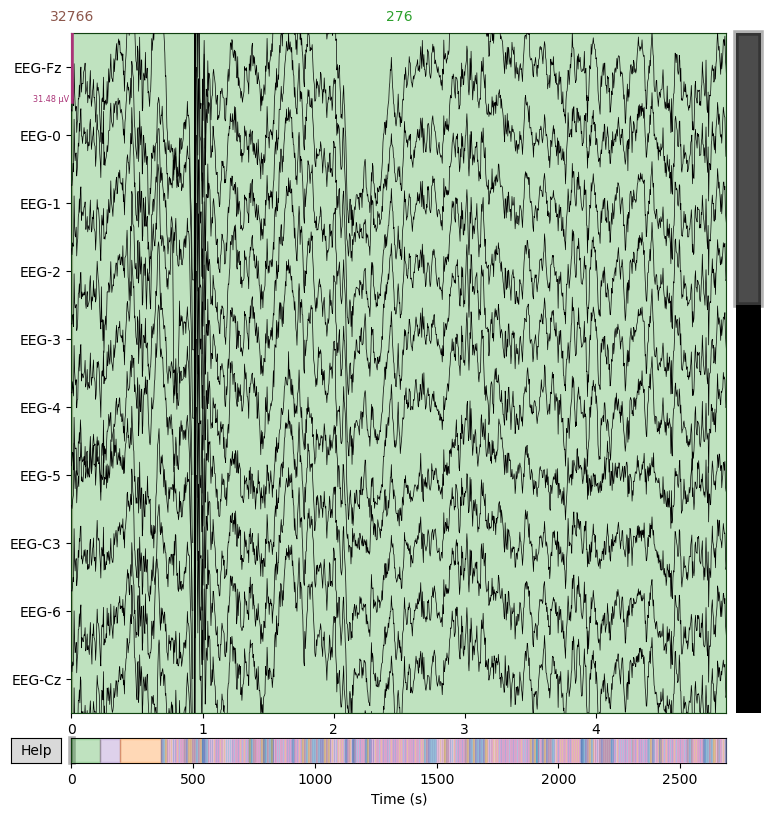

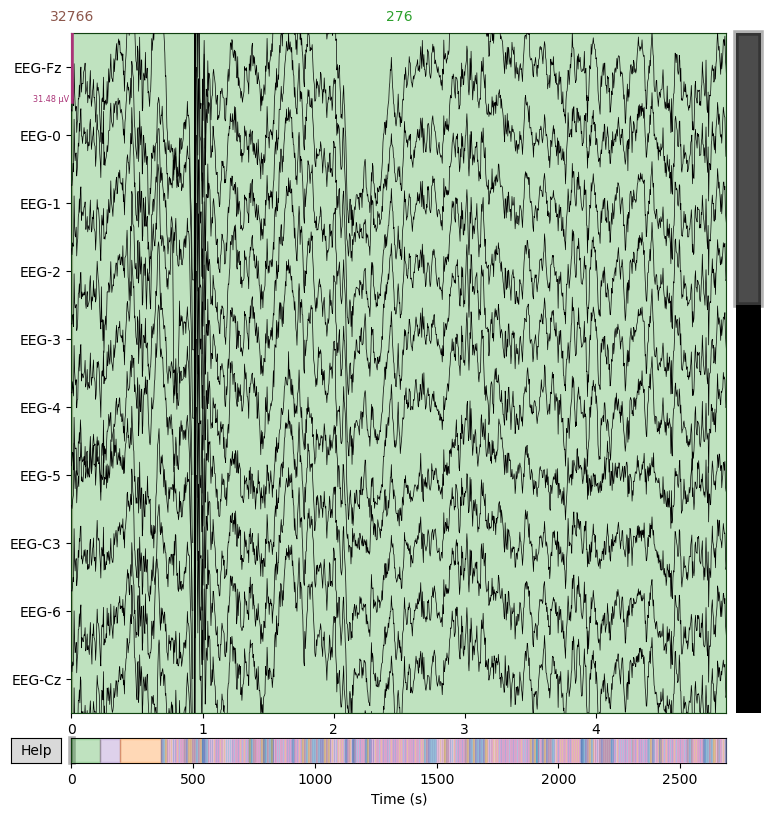

In [10]:
# plot a .gdf using mne
file_path = DATA_DIR + "/" + "A01T.gdf"
raw = mne.io.read_raw_gdf(file_path, preload=True)
print(raw)
raw.plot(n_channels=10, duration=5, scalings='auto')